In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


### Foward propagation
We note $w^l \in \mathbb{R}^{n_{l-1}\times n_l}$ is the weight, 	 $a^l=(a^l_1,a^l_2,...,a^l_{n_l}) \in \mathbb{R}^{n_l}$ is the activation and $g^l$ is the activation function at the $l$-th layer. We obtain the equation of forward propagation 
	\begin{align*}
	z^l&=W^la^{l-1}+b^l\\
	a^l&=g^l(z^l).
	\end{align*}	


### Backward propagation
Suppose that $L=L(w,z,a,b)$ is the loss function, then we obtain the backward propagation
	\begin{align*}
	\frac{\partial L}{\partial z^l}&=\frac{\partial L}{\partial a^l}\frac{\partial g^l}{\partial z^l}\\
		\frac{\partial L}{\partial w^l}&=\frac{\partial L}{\partial z^l} a^{l-1} \\
		 \frac{\partial L}{\partial b^l}&=\frac{\partial L}{\partial z^l} \\
		 \frac{\partial L}{\partial a^{l-1}}&=\frac{\partial L}{\partial z^l} w^l.
	\end{align*}
It means that if we have $\frac{\partial L}{\partial a^{l}} $ so we can calculate the  	
$\frac{\partial L}{\partial w^l},  \frac{\partial L}{\partial b^l} \text{ and } \frac{\partial L}{\partial a^{l}}$.


### Mnist Digits Classification

#### Prepare the data

In [3]:
train=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y_train=train[['label']]

In [6]:
X_train=train.drop('label', axis=1)

In [7]:
X_train.shape

(42000, 784)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
X_train=X_train.values.reshape(-1,28,28,1)

In [10]:
X_test=test.values.reshape(-1,28,28,1)

In [11]:
X_train.shape

(42000, 28, 28, 1)

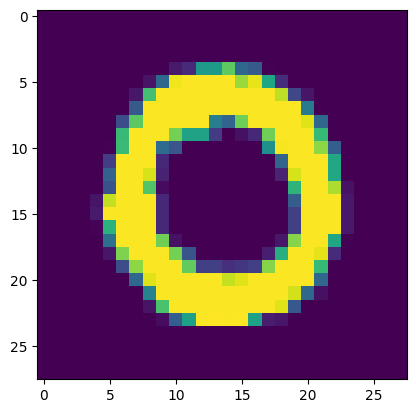

In [12]:
plt.imshow(X_train[1][:,:,0])

In [13]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [14]:
y_train=to_categorical(y_train, 10)
y_train.shape

(42000, 10)

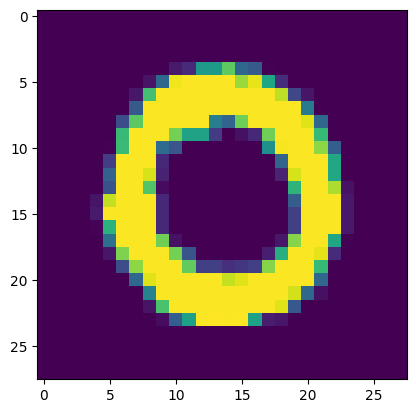

In [17]:
plt.imshow(X_train[1])

In [15]:
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.2)

### LeNet network

In [16]:
model=tf.keras.Sequential([
    layers.Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.2),
    layers.MaxPooling2D(pool_size=2),
    
    layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.2),
    layers.MaxPooling2D(pool_size=2),
    
    layers.Flatten(),
    layers.Dense(units=120, activation='relu'),
    layers.Dropout(rate=0.2),
    layers.BatchNormalization(),
    layers.Dense(units=84, activation='relu'),
    layers.Dropout(rate=0.2),
    layers.BatchNormalization(),
    layers.Dense(units=10, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 24, 24, 6)      │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 120)            │           480 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 84)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 84)             │           336 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,330 (177.07 KB)

 Trainable params: 44,878 (175.30 KB)

 Non-trainable params: 452 (1.77 KB)

In [18]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    metrics=['accuracy']    
)

In [24]:
history=model.fit(
    X_train, y_train,
    validation_data=(X_val,y_val),
    batch_size=128,
    epochs=20

)

Epoch 1/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.4618 - loss: 1.6736 - val_accuracy: 0.9352 - val_loss: 0.2501
Epoch 2/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.9104 - loss: 0.3244 - val_accuracy: 0.9601 - val_loss: 0.1465
Epoch 3/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.9391 - loss: 0.2101 - val_accuracy: 0.9710 - val_loss: 0.1077
Epoch 4/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - accuracy: 0.9555 - loss: 0.1520 - val_accuracy: 0.9696 - val_loss: 0.1008
Epoch 5/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.9607 - loss: 0.1319 - val_accuracy: 0.9774 - val_loss: 0.0750
Epoch 6/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - accuracy: 0.9689 - loss: 0.1060 - val_accuracy: 0.9805 - val_loss: 0.0686
Epoch 7/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.9685 - loss: 0.1065 - val_accuracy: 0.9838 - val_loss: 0.0572
Epoch 8/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 15s 56ms/step - accuracy: 0.9726 - loss: 0.0934 - 

In [25]:
history_df=pd.DataFrame(history.history)

<Axes: >

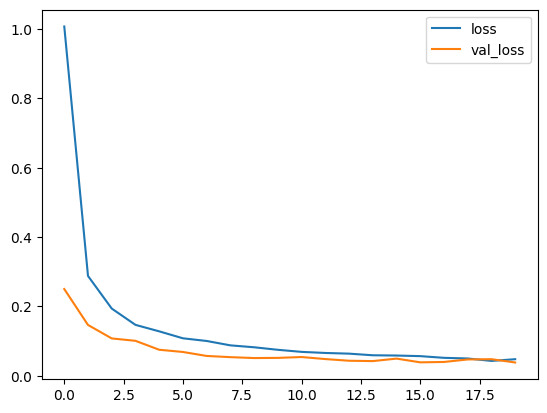

In [26]:
history_df[['loss', 'val_loss']].plot()

<Axes: >

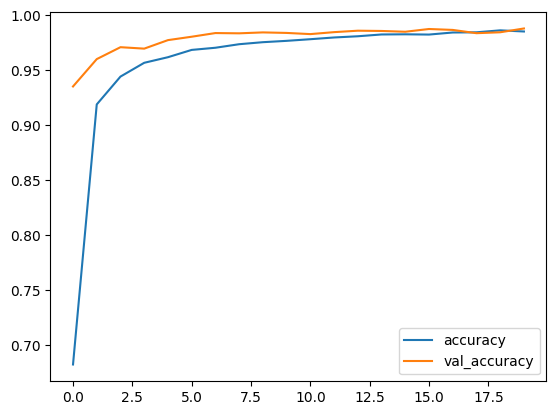

In [27]:
history_df[['accuracy', 'val_accuracy']].plot()

In [28]:
results=model.predict(X_test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step


In [29]:
results.shape

(28000, 10)

In [30]:
results=np.argmax(results, axis=1)

In [34]:
results=pd.Series(results, name='Label')
results.head()

0    2
1    0
2    9
3    9
4    3
Name: Label, dtype: int64

In [35]:
submission=pd.concat([pd.Series(range(1,28001), name='ImageId'), results], axis=1)
submission.to_csv("cnn_mnist_datagen.csv", index=False)